<a href="https://colab.research.google.com/github/romankova27/microbio/blob/main/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%22%D0%9C%D0%B8%D0%BA%D1%80%D0%BE%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%82%D0%BE%D1%80_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Установка библиотеки OpenCV с помощью pip
!pip install opencv-python

# Импорт необходимых модулей
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [7]:
# Загрузка изображения
img = cv2.imread('/content/photo_2024-05-21 15.41.53-Photoroom.png-Photoroom.png')

In [47]:
def microbio(img):
# Применение медианного фильтра для сглаживания изображения и уменьшения шума
  img = cv2.medianBlur(img,5)
# Преобразование изображения в оттенки серого
  cimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Применение бинаризации для получения двоичного изображения
  _, cimg = cv2.threshold(cimg, 150, 255, cv2.THRESH_BINARY)
  cimg_copy= cimg.copy()

# Расширение белых областей на изображении
  kernel = np.ones((7, 7), 'uint8')
  cimg = cv2.dilate(cimg, kernel, iterations=1)


# Поиск контуров на расширенном изображении
  contours, hierarchy = cv2.findContours(cimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  img_copy = img.copy()
# Создаем списки для хранения площадей контуров
  min_area = []
  max_area = []
  n_area = []

# Проходим по всем контурам, проверяем площадь контура и добавляем в соответствующий список
  for contour in contours:
      area = cv2.contourArea(contour)
      if area > 20000:
        max_area.append(area)
      elif area <= 50:
        min_area.append(area)
      else:
        n_area.append(area)
  max_area = 20000 # Максимальная площадь контура
  min_area = 0 # Минимальная площадь контура

# Создаем список отфильтрованных контуров, удовлетворяющих условиям площади
  filtered_contours = [i for i in contours if min_area <= cv2.contourArea(i) <= max_area]


# Рисуем отфильтрованные контуры на изображении
  for contour in filtered_contours:
      cv2.drawContours(img_copy, contour, -1, (0,255,0), 2)

  # Перебор контуров и отображение каждого
  for i, contour in enumerate(filtered_contours):
    # Создание маски для контура
      mask = np.zeros_like(cimg_copy)  # создаем черное изображение того же размера
      cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

    # Применение маски к исходному изображению
      result = cv2.bitwise_and(cimg_copy, cimg_copy, mask=mask)

    # Выделение области с контуром
      x, y, w, h = cv2.boundingRect(contour)
      cropped = result[y:y+h, x:x+w]
      _, cropped_with_tresh = cv2.threshold(cropped, 150, 255, cv2.THRESH_BINARY)

    # Нахождение новых контуров в выделенной области
      new_contours, hierarchy = cv2.findContours(cropped_with_tresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      cv2.drawContours(cropped_with_tresh, new_contours, -1, (0,0,255), 1)

    # Фильтрация новых контуров по размеру
      s_tresh = 10
      filtered_contours_2 = [contour for contour in new_contours if cv2.contourArea(contour) > s_tresh]
    # Смещение координат новых контуров обратно к исходным координатам
      for i in filtered_contours_2:
          for j, _ in enumerate(i):
            i[j][0][0] += x
            i[j][0][1] += y
    # Отображение отфильтрованных новых контуров на изображении
      cv2.drawContours(img, filtered_contours_2, -1, (0,0,255), 1)
  cv2_imshow(img)
  return filtered_contours


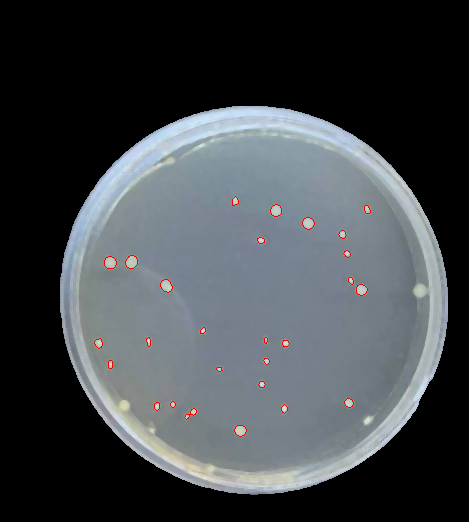

[array([[[309, 164]],
 
        [[310, 163]],
 
        [[311, 164]],
 
        [[311, 165]],
 
        [[310, 166]],
 
        [[309, 165]]], dtype=int32),
 array([[[234, 422]],
 
        [[232, 424]],
 
        [[232, 425]],
 
        [[231, 426]],
 
        [[231, 434]],
 
        [[232, 435]],
 
        [[232, 436]],
 
        [[234, 438]],
 
        [[235, 438]],
 
        [[236, 439]],
 
        [[244, 439]],
 
        [[245, 438]],
 
        [[246, 438]],
 
        [[248, 436]],
 
        [[248, 435]],
 
        [[249, 434]],
 
        [[249, 426]],
 
        [[248, 425]],
 
        [[248, 424]],
 
        [[247, 423]],
 
        [[246, 423]],
 
        [[245, 422]]], dtype=int32),
 array([[[190, 405]],
 
        [[189, 406]],
 
        [[188, 406]],
 
        [[188, 407]],
 
        [[187, 408]],
 
        [[187, 410]],
 
        [[186, 411]],
 
        [[183, 411]],
 
        [[182, 412]],
 
        [[182, 413]],
 
        [[181, 414]],
 
        [[181, 420]],
 
        [[183,

In [48]:
microbio(img)